In [55]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("anonymized_SAP_Data.csv")

In [3]:
# data.head()

In [4]:
list(data)

['Unnamed: 0',
 'Date.Time',
 'Main_Mass_Flow',
 'Additive_1_Ratio',
 'Additive_2_Ratio',
 'Additive_3_Ratio',
 'Additive_4_Ratio',
 'Additive_5_Ratio',
 'Additive_6_Ratio',
 'Flow_Gas_Ratio',
 'Pressure',
 'T_Zone_1',
 'T_Zone_2',
 'T_Zone_3',
 'T_Zone_4',
 'T_Zone_5',
 'T_Zone_6',
 'T_Zone_7',
 'T_Zone_8',
 'T_Zone_9',
 'T_Zone_10',
 'Blending',
 'Quality']

In [5]:
data.shape

(2709, 23)

In [6]:
# data.describe(include='all')

In [7]:
# data.isna().sum()

In [8]:
dates = data['Date.Time']
data.drop(['Unnamed: 0', 'Date.Time'], axis = 1, inplace = True)
data.columns

Index(['Main_Mass_Flow', 'Additive_1_Ratio', 'Additive_2_Ratio',
       'Additive_3_Ratio', 'Additive_4_Ratio', 'Additive_5_Ratio',
       'Additive_6_Ratio', 'Flow_Gas_Ratio', 'Pressure', 'T_Zone_1',
       'T_Zone_2', 'T_Zone_3', 'T_Zone_4', 'T_Zone_5', 'T_Zone_6', 'T_Zone_7',
       'T_Zone_8', 'T_Zone_9', 'T_Zone_10', 'Blending', 'Quality'],
      dtype='object')

In [9]:
# dates

In [10]:
data.drop(['Pressure'], axis = 1, inplace = True)

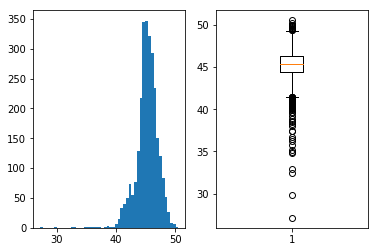

In [11]:
plt.subplot(1, 2, 1)
plt.hist(data.Quality, bins = 50)

plt.subplot(1, 2, 2)
plt.boxplot(data.Quality)
plt.show()

In [12]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)
# display_all(data.describe().T)

In [53]:
display_all(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Main_Mass_Flow,2663.0,19473.880200,1063.280144,15063.688477,18759.059570,19485.019531,20289.381836,21387.343750
Additive_1_Ratio,2663.0,0.000683,0.000026,0.000621,0.000694,0.000694,0.000694,0.000694
Additive_2_Ratio,2663.0,0.070199,0.009967,0.037391,0.064253,0.070000,0.075882,0.114304
Additive_3_Ratio,2663.0,0.000887,0.000035,0.000876,0.000876,0.000876,0.000876,0.001000
Additive_4_Ratio,2663.0,0.002097,0.000527,0.001000,0.001886,0.002000,0.002000,0.003500
Additive_5_Ratio,2663.0,0.000943,0.000029,0.000910,0.000910,0.000971,0.000971,0.000971
Additive_6_Ratio,2663.0,0.004801,0.001469,0.000000,0.005250,0.005250,0.005250,0.005250
Flow_Gas_Ratio,2663.0,3.013906,0.214915,2.284886,2.991385,3.001272,3.015617,4.474757
T_Zone_1,2663.0,197.482703,1.636473,186.761017,197.794159,197.979858,198.118370,201.257904
T_Zone_2,2663.0,189.363981,1.440237,161.497040,188.386131,189.511215,190.323730,202.035049


In [13]:
# for column in data.columns:
#     series_obj = data[column]
#     zeros_obj = np.where(series_obj == 0)[0]
#     print(column)
#     print(zeros_obj)

In [14]:
# for column in data.columns:
#     series_obj = data[column]
#     nan_obj = np.where(np.isnan(series_obj))[0]
#     print(column)
#     print(nan_obj

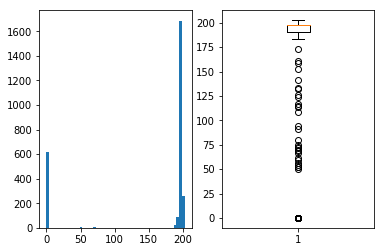

In [15]:
plt.subplot(1, 2, 1)
plt.hist(data.T_Zone_1, bins = 50)

plt.subplot(1, 2, 2)
plt.boxplot(data.T_Zone_1)
plt.show()

In [16]:
rows_to_delete = np.where(data.Main_Mass_Flow == 0)[0]
# also add 337, 2533

rows_to_delete = np.sort(np.concatenate((rows_to_delete, np.array([337, 2533])), axis = 0))
data.drop(rows_to_delete, axis = 0, inplace = True)
# display_all(data.describe().T)

In [17]:
#copy dataframe to have one without replaced values
data2 = data.copy()

In [18]:
#remove rows with erroneous Main_Mass_Flow values from data2 
#(as we'll do with data)
data2 = data2[data2.Main_Mass_Flow > 15000]

In [19]:
# change T_Zone_1 zero vals
new_zero_val_T = np.median(data.T_Zone_1.iloc[np.where(data.T_Zone_1 > 50)])
data.T_Zone_1.iloc[np.where(data.T_Zone_1 <= 50)] = new_zero_val_T

# change Blending vals
new_zero_val_B = np.median(data.Blending.iloc[np.where(data.Blending > 20)])
data.Blending.iloc[np.where(data.Blending <= 20)] = new_zero_val_B

# display_all(data.describe().T)

In [20]:
data = data[data.Main_Mass_Flow > 15000]
# display_all(data.describe().T)

In [21]:
#data3 without binarized T_Zone
data3 = data.copy()

In [22]:
for i in range(1,10):
    new_colname = "T_Increase_" + str(i)
    colname_i = "T_Zone_" + str(i)
    colname_inext = "T_Zone_" + str(i+1)
    vals = (data[colname_i] <= data[colname_inext]).astype(int)
    data[new_colname] = vals

In [23]:
display_all(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Main_Mass_Flow,2663.0,19473.880200,1063.280144,15063.688477,18759.059570,19485.019531,20289.381836,21387.343750
Additive_1_Ratio,2663.0,0.000683,0.000026,0.000621,0.000694,0.000694,0.000694,0.000694
Additive_2_Ratio,2663.0,0.070199,0.009967,0.037391,0.064253,0.070000,0.075882,0.114304
Additive_3_Ratio,2663.0,0.000887,0.000035,0.000876,0.000876,0.000876,0.000876,0.001000
Additive_4_Ratio,2663.0,0.002097,0.000527,0.001000,0.001886,0.002000,0.002000,0.003500
Additive_5_Ratio,2663.0,0.000943,0.000029,0.000910,0.000910,0.000971,0.000971,0.000971
Additive_6_Ratio,2663.0,0.004801,0.001469,0.000000,0.005250,0.005250,0.005250,0.005250
Flow_Gas_Ratio,2663.0,3.013906,0.214915,2.284886,2.991385,3.001272,3.015617,4.474757
T_Zone_1,2663.0,197.482703,1.636473,186.761017,197.794159,197.979858,198.118370,201.257904
T_Zone_2,2663.0,189.363981,1.440237,161.497040,188.386131,189.511215,190.323730,202.035049


In [24]:
display_all(data2.describe().T)

,count,mean,std,min,25%,50%,75%,max
Main_Mass_Flow,2663.0,19473.880200,1063.280144,15063.688477,18759.059570,19485.019531,20289.381836,21387.343750
Additive_1_Ratio,2663.0,0.000683,0.000026,0.000621,0.000694,0.000694,0.000694,0.000694
Additive_2_Ratio,2663.0,0.070199,0.009967,0.037391,0.064253,0.070000,0.075882,0.114304
Additive_3_Ratio,2663.0,0.000887,0.000035,0.000876,0.000876,0.000876,0.000876,0.001000
Additive_4_Ratio,2663.0,0.002097,0.000527,0.001000,0.001886,0.002000,0.002000,0.003500
Additive_5_Ratio,2663.0,0.000943,0.000029,0.000910,0.000910,0.000971,0.000971,0.000971
Additive_6_Ratio,2663.0,0.004801,0.001469,0.000000,0.005250,0.005250,0.005250,0.005250
Flow_Gas_Ratio,2663.0,3.013906,0.214915,2.284886,2.991385,3.001272,3.015617,4.474757
T_Zone_1,2663.0,152.281144,82.862105,0.000000,191.002701,197.837631,198.118370,201.257904
T_Zone_2,2663.0,189.363981,1.440237,161.497040,188.386131,189.511215,190.323730,202.035049


In [25]:
display_all(data3.describe().T)

,count,mean,std,min,25%,50%,75%,max
Main_Mass_Flow,2663.0,19473.880200,1063.280144,15063.688477,18759.059570,19485.019531,20289.381836,21387.343750
Additive_1_Ratio,2663.0,0.000683,0.000026,0.000621,0.000694,0.000694,0.000694,0.000694
Additive_2_Ratio,2663.0,0.070199,0.009967,0.037391,0.064253,0.070000,0.075882,0.114304
Additive_3_Ratio,2663.0,0.000887,0.000035,0.000876,0.000876,0.000876,0.000876,0.001000
Additive_4_Ratio,2663.0,0.002097,0.000527,0.001000,0.001886,0.002000,0.002000,0.003500
Additive_5_Ratio,2663.0,0.000943,0.000029,0.000910,0.000910,0.000971,0.000971,0.000971
Additive_6_Ratio,2663.0,0.004801,0.001469,0.000000,0.005250,0.005250,0.005250,0.005250
Flow_Gas_Ratio,2663.0,3.013906,0.214915,2.284886,2.991385,3.001272,3.015617,4.474757
T_Zone_1,2663.0,197.482703,1.636473,186.761017,197.794159,197.979858,198.118370,201.257904
T_Zone_2,2663.0,189.363981,1.440237,161.497040,188.386131,189.511215,190.323730,202.035049


# Models

In [26]:
#scale all the non-binary features
scaled_colnames = data.columns[0:18]
scaled_features = data.copy()
features = scaled_features[scaled_colnames]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[scaled_colnames] = features

In [27]:
y = scaled_features.Quality
# X = scaled_features.copy()
# scaled_features.drop(['Quality'], axis = 1, inplace = True)
scaled_features.drop(['Quality'], axis = 1, inplace = True)
X = scaled_features


# let's use 80% train/validate, 20% test... so with our setup, it will be 60/20/20
train_rows = math.ceil(0.80 * X.shape[0])
test_rows = (len(X) - train_rows)
X_train, X_test = X[0:train_rows], X[-test_rows:]
y_train, y_test = y[0:train_rows], y[-test_rows:]

In [28]:
# display_all(scaled_features.describe().T)

In [29]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
def calc_error(predicted, actual):
    return(actual - predicted)

In [31]:
# lm = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
lm = LinearRegression()
fit_model = lm.fit(X_train2, y_train2)
pred_v = fit_model.predict(X_valid)

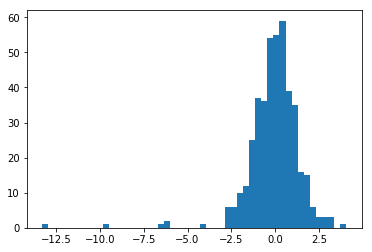

In [32]:
errors = calc_error(pred_v, y_valid)
plt.hist(errors, bins = 50)
plt.show()

In [33]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, pred_v))
print('R-squared: %.2f'
      % r2_score(y_valid, pred_v))

Mean squared error: 2.17
R-squared: 0.45


In [57]:
# # Train a decision tree classifier.
# dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
# dt.fit(X_train2, y_train2)
# print ('Accuracy:', dt.score(y_valid, pred_v))

In [34]:
# ridge_model = Ridge(alpha=1.0)
# ridge_model.fit(X_train2, y_train2)
# pred_r = ridge_model.predict(X_valid)

In [35]:
# print("Mean squared error: %.2f"
#       % mean_squared_error(y_valid, pred_r))
# print('R-squared: %.2f'
#       % r2_score(y_valid, pred_r))

In [36]:
Xd = data.copy()
yd = Xd.Quality
Xd.drop(['Quality'], axis = 1, inplace = True)


# let's use 80% train/validate, 20% test... so with our setup, it will be 60/20/20
train_rows = math.ceil(0.80 * Xd.shape[0])
test_rows = (len(Xd) - train_rows)
Xd_train, Xd_test = Xd[0:train_rows], Xd[-test_rows:]
yd_train, yd_test = yd[0:train_rows], yd[-test_rows:]

In [37]:
Xd_train2, Xd_valid, yd_train2, yd_valid = train_test_split(Xd_train, yd_train, test_size=0.2, random_state=42)

In [38]:
lm = LinearRegression()
fit_model = lm.fit(Xd_train2, yd_train2)
pred_vd = fit_model.predict(Xd_valid)

In [39]:
print("Mean squared error: %.2f"
      % mean_squared_error(yd_valid, pred_vd))
print('R-squared: %.2f'
      % r2_score(yd_valid, pred_vd))

Mean squared error: 2.17
R-squared: 0.45


In [40]:
X2 = data2.copy()
y2 = X2.Quality
X2.drop(['Quality'], axis = 1, inplace = True)


# let's use 80% train/validate, 20% test... so with our setup, it will be 60/20/20
train_rows = math.ceil(0.80 * X2.shape[0])
test_rows = (len(X2) - train_rows)
X2_train, X2_test = X2[0:train_rows], X2[-test_rows:]
y2_train, y2_test = y2[0:train_rows], y2[-test_rows:]

In [41]:
X2_train2, X2_valid, y2_train2, y2_valid = train_test_split(X2_train, y2_train, test_size=0.2, random_state=42)

In [42]:
lm = LinearRegression()
fit_model = lm.fit(X2_train2, y2_train2)
pred_v2 = fit_model.predict(X2_valid)

In [43]:
print("Mean squared error: %.2f"
      % mean_squared_error(y2_valid, pred_v2))
print('R-squared: %.2f'
      % r2_score(y2_valid, pred_v2))

Mean squared error: 2.26
R-squared: 0.43


In [44]:
X3 = data3.copy()
y3 = X3.Quality
X3.drop(['Quality'], axis = 1, inplace = True)


# let's use 80% train/validate, 20% test... so with our setup, it will be 60/20/20
train_rows = math.ceil(0.80 * X2.shape[0])
test_rows = (len(X2) - train_rows)
X3_train, X3_test = X3[0:train_rows], X3[-test_rows:]
y3_train, y3_test = y3[0:train_rows], y3[-test_rows:]

In [45]:
X3_train2, X3_valid, y3_train2, y3_valid = train_test_split(X3_train, y3_train, test_size=0.2, random_state=42)

In [46]:
lm = LinearRegression()
fit_model = lm.fit(X3_train2, y3_train2)
pred_v3 = fit_model.predict(X3_valid)

In [47]:
print("Mean squared error: %.2f"
      % mean_squared_error(y3_valid, pred_v3))
print('R-squared: %.2f'
      % r2_score(y3_valid, pred_v3))

Mean squared error: 2.26
R-squared: 0.43


In [48]:
scaled3_colnames = data3.columns[0:18]
scaled3 = data3.copy()
features3 = scaled3[scaled3_colnames]
scaler3 = StandardScaler().fit(features3.values)
features3 = scaler.transform(features3.values)
scaled3[scaled3_colnames] = features3

In [49]:
y3s = scaled3.Quality
X3s = scaled3.copy()
X3s.drop(['Quality'], axis = 1, inplace = True)

# let's use 80% train/validate, 20% test... so with our setup, it will be 60/20/20
train_rows = math.ceil(0.80 * X.shape[0])
test_rows = (len(X) - train_rows)
X3s_train, X3s_test = X3s[0:train_rows], X3s[-test_rows:]
y3s_train, y3s_test = y3s[0:train_rows], y3s[-test_rows:]

In [50]:
X3s_train2, X3s_valid, y3s_train2, y3s_valid = train_test_split(X3s_train, y3s_train, test_size=0.2, random_state=42)

In [54]:
lm = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
fit_model = lm.fit(X3s_train2, y3s_train2)
pred_v3s = fit_model.predict(X3s_valid)

In [52]:
print("Mean squared error: %.2f"
      % mean_squared_error(y3s_valid, pred_v3s))
print('R-squared: %.2f'
      % r2_score(y3s_valid, pred_v3s))

Mean squared error: 2.26
R-squared: 0.43
